# **Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/GDrive')

Mounted at /content/GDrive


In [ ]:
columns = ['Magnitude','Depth','CDI','MMI','SIG','Alert']
csv_path = '/content/GDrive/MyDrive/COS3302/earthquake_alert_balanced_dataset.csv'
dfs = pd.read_csv(csv_path,header=None,names = columns)
dfs = dfs.iloc[1:]

In [ ]:
dfs.head()

,Magnitude,Depth,CDI,MMI,SIG,Alert
1,7.00,14.00,8.00,7.00,0.00,green
2,6.90,25.00,4.00,4.00,-33.00,green
3,7.00,579.00,3.00,3.00,-13.00,green
4,7.30,37.00,5.00,5.00,65.00,green
5,6.60,624.00,0.00,2.00,-98.00,green


In [ ]:
dfs.shape

(1300, 6)

In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 1 to 1300
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Magnitude  1300 non-null   object
 1   Depth      1300 non-null   object
 2   CDI        1300 non-null   object
 3   MMI        1300 non-null   object
 4   SIG        1300 non-null   object
 5   Alert      1300 non-null   object
dtypes: object(6)
memory usage: 61.1+ KB


In [ ]:
dfs.describe()

,Magnitude,Depth,CDI,MMI,SIG,Alert
count,1300,1300,1300,1300,1300,1300
unique,167,173,10,9,238,4
top,6.50,10.00,8.00,8.00,93.00,green
freq,103,120,536,474,25,325


In [ ]:
# Convert relevant columns to numeric, coercing errors
for col in ['Magnitude', 'Depth', 'CDI', 'MMI', 'SIG']:
    dfs[col] = pd.to_numeric(dfs[col], errors='coerce')

# Display descriptive statistics for numeric columns
display(dfs.describe())

,Magnitude,Depth,CDI,MMI,SIG
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,7.061008,50.321538,6.976154,6.939231,-9.749231
std,0.423738,104.348286,2.244875,1.354774,62.245214
min,6.500000,2.000000,0.000000,1.000000,-128.000000
25%,6.700000,12.000000,6.000000,6.000000,-54.000000
50%,7.000000,19.000000,8.000000,7.000000,-7.000000
75%,7.300000,38.000000,8.000000,8.000000,31.000000
max,8.600000,670.000000,9.000000,9.000000,127.000000


# Statistics

In [ ]:
data_green = dfs[dfs['Alert'] == 'green']
data_yellow = dfs[dfs['Alert'] == 'yellow']
data_orange = dfs[dfs['Alert'] == 'orange']
data_red = dfs[dfs['Alert'] == 'red']

In [ ]:
data_green.describe()

,Magnitude,Depth,CDI,MMI,SIG
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,6.856000,114.547692,4.369231,5.243077,-40.461538
std,0.374087,187.163431,2.870504,1.394209,64.357095
min,6.500000,2.000000,0.000000,1.000000,-128.000000
25%,6.600000,13.000000,2.000000,4.000000,-96.000000
50%,6.800000,27.000000,5.000000,5.000000,-53.000000
75%,7.000000,107.000000,7.000000,6.000000,-5.000000
max,8.300000,670.000000,9.000000,8.000000,127.000000


In [ ]:
data_yellow.describe()

,Magnitude,Depth,CDI,MMI,SIG
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,7.081846,41.058462,7.344615,6.916923,-22.621538
std,0.466477,41.858960,1.203651,0.644916,72.199707
min,6.500000,5.000000,3.000000,6.000000,-128.000000
25%,6.700000,14.000000,7.000000,7.000000,-81.000000
50%,6.980000,22.000000,8.000000,7.000000,-34.000000
75%,7.430000,44.000000,8.000000,7.000000,32.000000
max,8.600000,146.000000,9.000000,9.000000,121.000000


In [ ]:
data_orange.describe()

,Magnitude,Depth,CDI,MMI,SIG
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,7.058000,29.781538,8.049231,7.566154,2.461538
std,0.389941,30.783167,0.601470,0.549488,47.194527
min,6.500000,10.000000,7.000000,7.000000,-117.000000
25%,6.780000,13.000000,8.000000,7.000000,-21.000000
50%,6.960000,19.000000,8.000000,8.000000,-1.000000
75%,7.250000,37.000000,8.000000,8.000000,51.000000
max,8.300000,231.000000,9.000000,9.000000,98.000000


In [ ]:
data_red.describe()

,Magnitude,Depth,CDI,MMI,SIG
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,7.248185,15.898462,8.141538,8.030769,21.624615
std,0.364054,9.463323,0.826806,0.470396,41.261370
min,6.600000,8.000000,5.000000,7.000000,-56.000000
25%,7.040000,9.000000,8.000000,8.000000,-8.000000
50%,7.220000,13.000000,8.000000,8.000000,24.000000
75%,7.510000,19.000000,9.000000,8.000000,38.000000
max,8.200000,47.000000,9.000000,9.000000,94.000000


# Visualization

In [ ]:
alert_palette = {'green': 'blue', 'yellow': 'green', 'orange': 'orange', 'red': 'red'}

## Magnitude

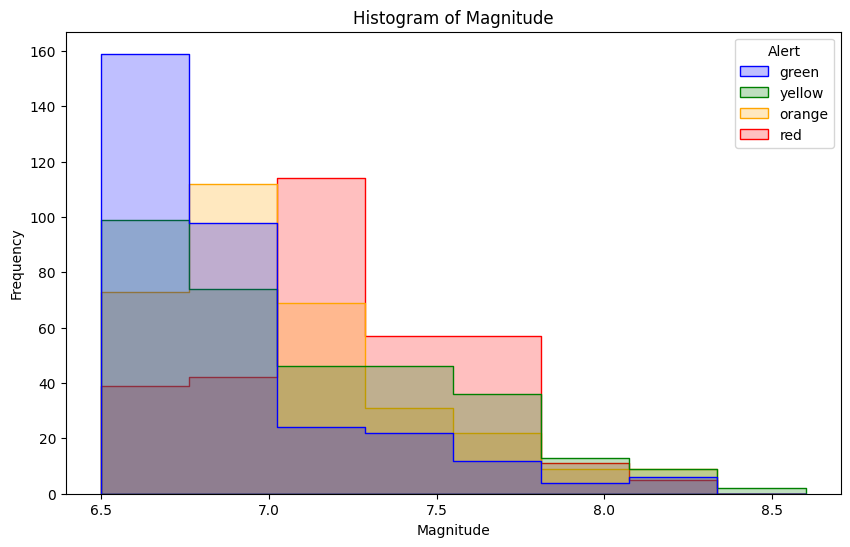

In [ ]:
alert_palette = {'green': 'blue', 'yellow': 'green', 'orange': 'orange', 'red': 'red'}
plt.figure(figsize=(10, 6)) # Increase figure size
sns.histplot(data = dfs, x = 'Magnitude', hue = 'Alert' ,element = 'step', binwidth=0.25, palette=alert_palette)
plt.title('Histogram of Magnitude') # Add title
plt.xlabel('Magnitude') # Add x-label
plt.ylabel('Frequency') # Add y-label
plt.show()

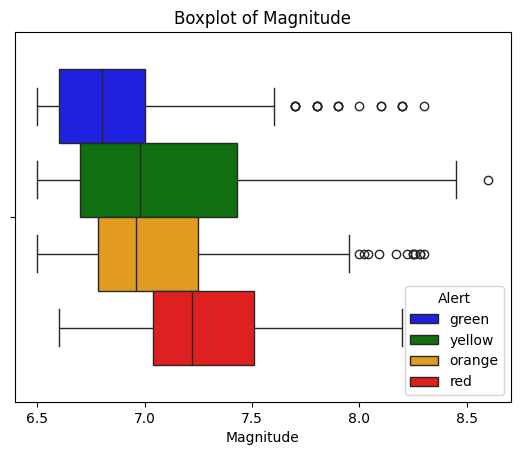

<Figure size 1000x800 with 0 Axes>

In [ ]:
sns.boxplot(data = dfs, x = "Magnitude",hue = 'Alert', showfliers = True, palette=alert_palette)
plt.title('Boxplot of Magnitude') # Add title
plt.figure(figsize=(10, 8)) # Increase figure size
plt.show()

In [ ]:
dfs['Magnitude Group'] = pd.cut(dfs['Magnitude'], bins = 3)
mg = pd.crosstab(dfs['Alert'],dfs['Magnitude Group'])
mg

Magnitude Group,"(6.498, 7.2]","(7.2, 7.9]","(7.9, 8.6]"
Alert,,,
green,281,34,10
orange,236,73,16
red,152,161,12
yellow,214,92,19


## Depth

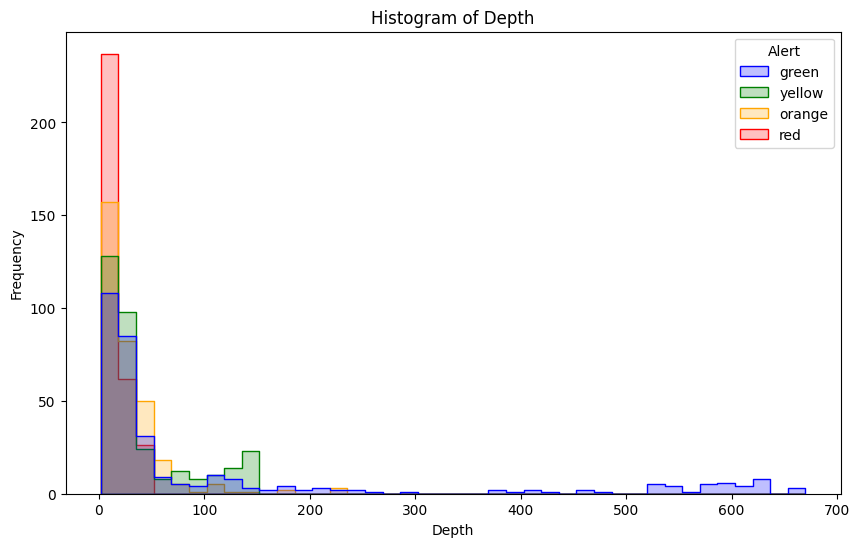

In [ ]:
alert_palette = {'green': 'blue', 'yellow': 'green', 'orange': 'orange', 'red': 'red'}
plt.figure(figsize=(10, 6)) # Increase figure size
sns.histplot(data = dfs, x = 'Depth', hue = 'Alert' ,element = 'step',  bins=40, palette=alert_palette) # You can change the number of bins here
# plt.ylim(0, 100) # Adjust the y-axis upper limit here
plt.title('Histogram of Depth') # Add title
plt.xlabel('Depth') # Add x-label
plt.ylabel('Frequency') # Add y-label
plt.show()

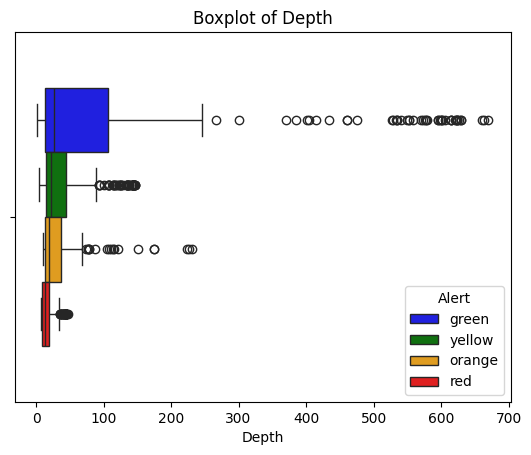

<Figure size 1000x800 with 0 Axes>

In [ ]:
sns.boxplot(data = dfs, x = "Depth",hue = 'Alert', showfliers = True, palette=alert_palette, width=0.7, whis = 1.5) # Adjust the width of the boxes
plt.title('Boxplot of Depth') # Add title
plt.figure(figsize=(10, 8)) # Increase figure size
plt.show()

In [ ]:
dfs['Depth Group'] = pd.cut(dfs['Depth'], bins = [0,100,200,300,400,500,600,700])
dp = pd.crosstab(dfs['Alert'],dfs['Depth Group'])
dp

Depth Group,"(0, 100]","(100, 200]","(200, 300]","(300, 400]","(400, 500]","(500, 600]","(600, 700]"
Alert,,,,,,,
green,241,30,8,3,7,19,17
orange,313,9,3,0,0,0,0
red,325,0,0,0,0,0,0
yellow,277,48,0,0,0,0,0


## CDI

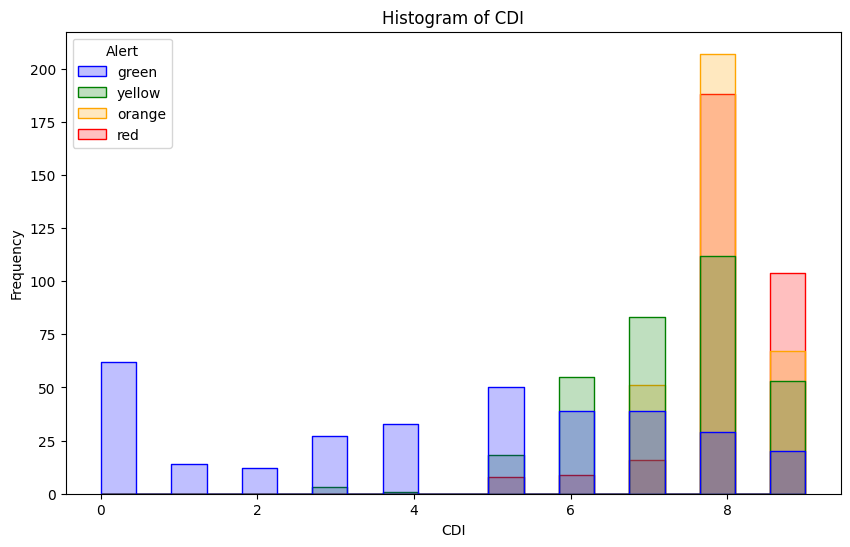

In [ ]:
alert_palette = {'green': 'blue', 'yellow': 'green', 'orange': 'orange', 'red': 'red'}
plt.figure(figsize=(10, 6)) # Increase figure size
sns.histplot(data = dfs, x = 'CDI', hue = 'Alert' ,element = 'step', bins=20, palette=alert_palette) # You can change the number of bins here
# plt.ylim(0, 100) # Adjust the y-axis upper limit here
plt.title('Histogram of CDI') # Add title
plt.xlabel('CDI') # Add x-label
plt.ylabel('Frequency') # Add y-label
plt.show()

<Axes: xlabel='CDI'>

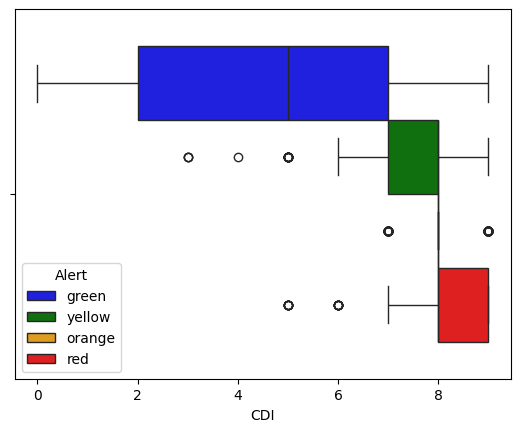

In [ ]:
sns.boxplot(data = dfs, x = "CDI",hue = 'Alert', showfliers = True, palette=alert_palette) # Adjust the width of the boxes

In [ ]:
dfs['CDI Group'] = pd.cut(dfs['CDI'], bins =10)
cd = pd.crosstab(dfs['Alert'],dfs['CDI Group'])
cd

CDI Group,"(-0.009, 0.9]","(0.9, 1.8]","(1.8, 2.7]","(2.7, 3.6]","(3.6, 4.5]","(4.5, 5.4]","(5.4, 6.3]","(6.3, 7.2]","(7.2, 8.1]","(8.1, 9.0]"
Alert,,,,,,,,,,
green,62,14,12,27,33,50,39,39,29,20
orange,0,0,0,0,0,0,0,51,207,67
red,0,0,0,0,0,8,9,16,188,104
yellow,0,0,0,3,1,18,55,83,112,53


## MMI

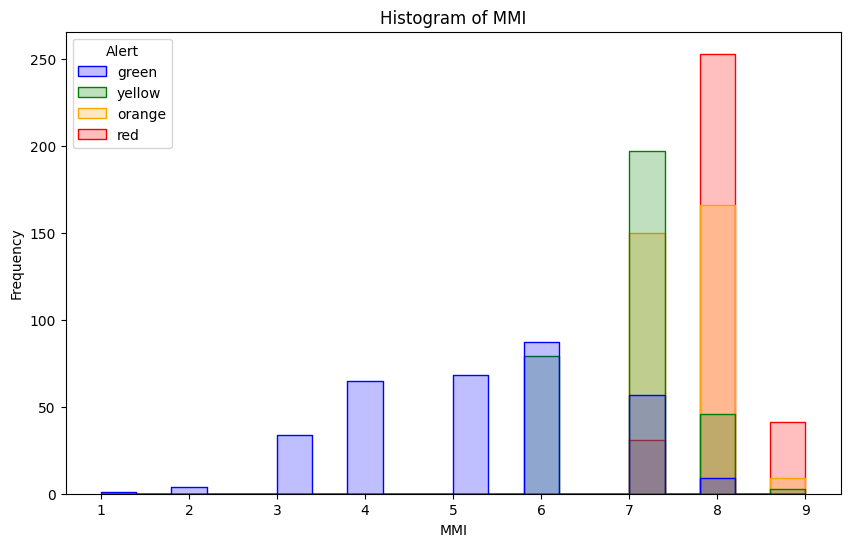

In [ ]:
alert_palette = {'green': 'blue', 'yellow': 'green', 'orange': 'orange', 'red': 'red'}
plt.figure(figsize=(10, 6)) # Increase figure size
sns.histplot(data = dfs, x = 'MMI', hue = 'Alert' ,element = 'step', bins=20, palette=alert_palette) # You can change the number of bins here
# plt.ylim(0, 100) # Adjust the y-axis upper limit here
plt.title('Histogram of MMI') # Add title
plt.xlabel('MMI') # Add x-label
plt.ylabel('Frequency') # Add y-label
plt.show()

<Axes: xlabel='MMI'>

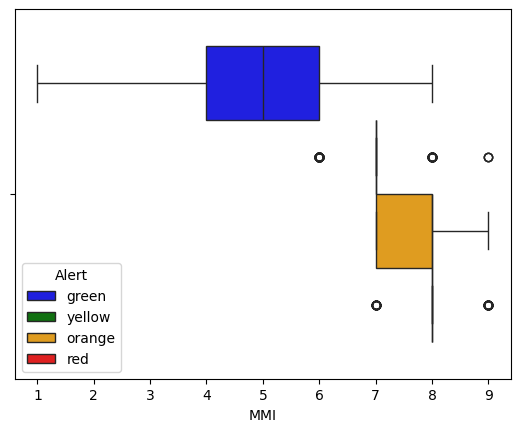

In [ ]:
sns.boxplot(data = dfs, x = "MMI",hue = 'Alert', showfliers = True, palette=alert_palette) # Adjust the width of the boxes

In [ ]:
dfs["MMI Group"] = pd.cut(dfs["MMI"], bins = [0,1,2,3,4,5,6,7,8,9,10])
mm = pd.crosstab(dfs["Alert"],dfs["MMI Group"])
mm

MMI Group,"(0, 1]","(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 6]","(6, 7]","(7, 8]","(8, 9]"
Alert,,,,,,,,,
green,1,4,34,65,68,87,57,9,0
orange,0,0,0,0,0,0,150,166,9
red,0,0,0,0,0,0,31,253,41
yellow,0,0,0,0,0,79,197,46,3


## SIG

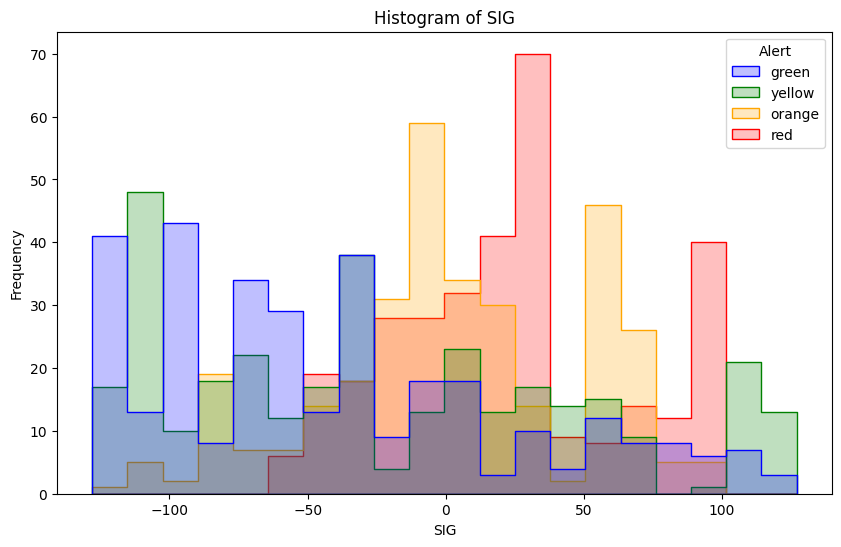

In [ ]:
alert_palette = {'green': 'blue', 'yellow': 'green', 'orange': 'orange', 'red': 'red'}
plt.figure(figsize=(10, 6)) # Increase figure size
sns.histplot(data = dfs, x = 'SIG', hue = 'Alert' ,element = 'step', bins=20, palette=alert_palette) # You can change the number of bins here
# plt.ylim(0, 100) # Adjust the y-axis upper limit here
plt.title('Histogram of SIG') # Add title
plt.xlabel('SIG') # Add x-label
plt.ylabel('Frequency') # Add y-label
plt.show()

<Axes: xlabel='SIG'>

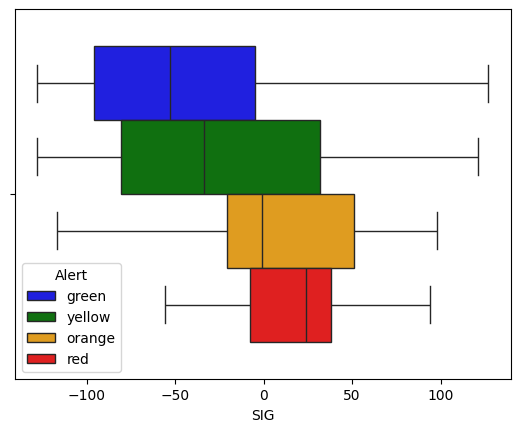

In [ ]:
sns.boxplot(data = dfs, x = "SIG",hue = 'Alert', showfliers = True, palette=alert_palette) # Adjust the width of the boxes

In [ ]:
dfs['SIG Group'] = pd.cut(dfs['SIG'], bins = 5)
sg = pd.crosstab(dfs['Alert'],dfs['SIG Group'])
sg

SIG Group,"(-128.255, -77.0]","(-77.0, -26.0]","(-26.0, 25.0]","(25.0, 76.0]","(76.0, 127.0]"
Alert,,,,,
green,118,103,46,35,23
orange,27,47,157,85,9
red,0,45,135,94,51
yellow,94,88,53,55,35


# Relationship

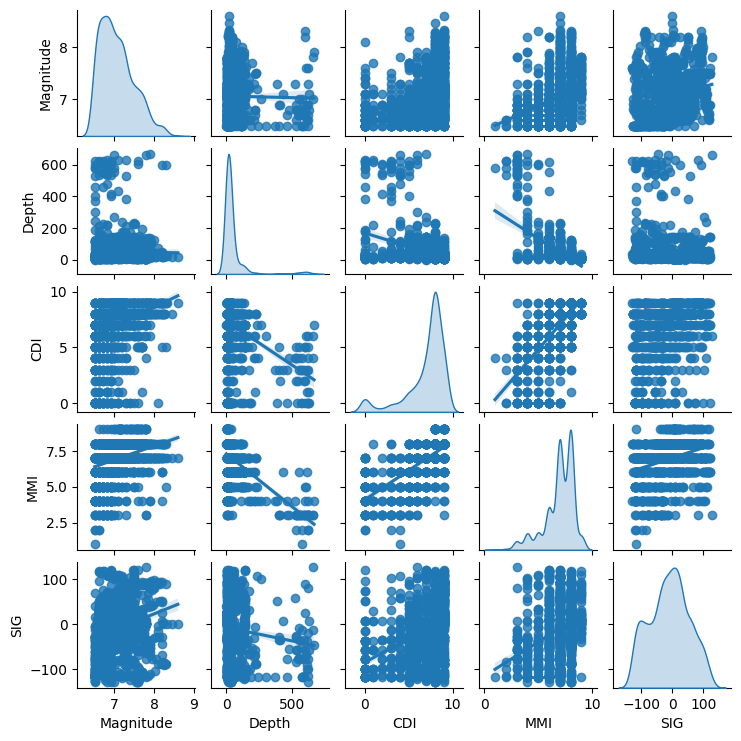

In [ ]:
sns.pairplot(dfs,height=1.5, diag_kind = 'kde', kind = "reg")

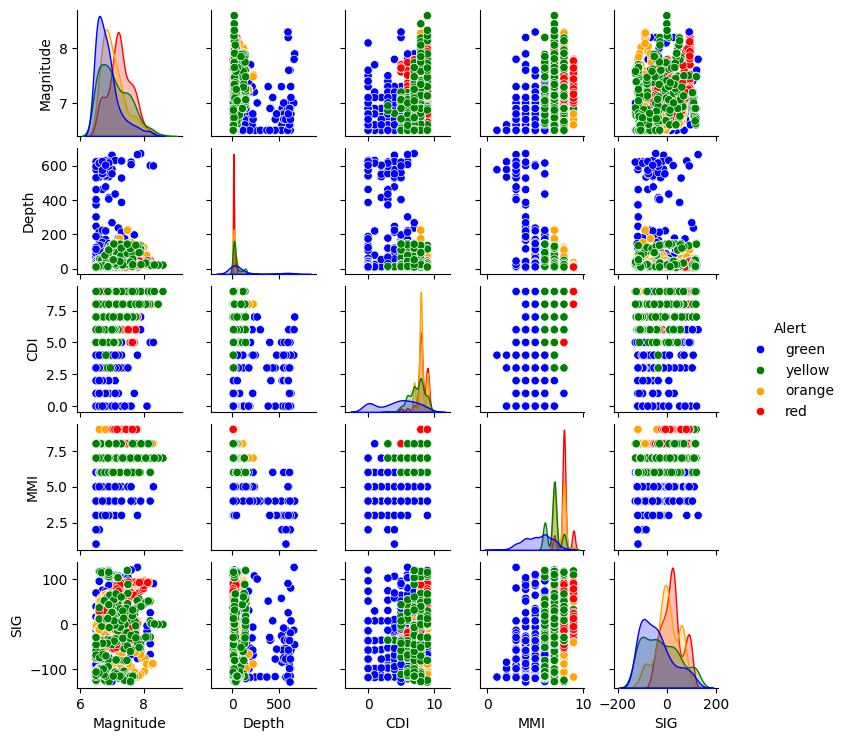

In [ ]:
sns.pairplot(dfs,height=1.5, diag_kind = 'kde', hue = 'Alert',palette=alert_palette)

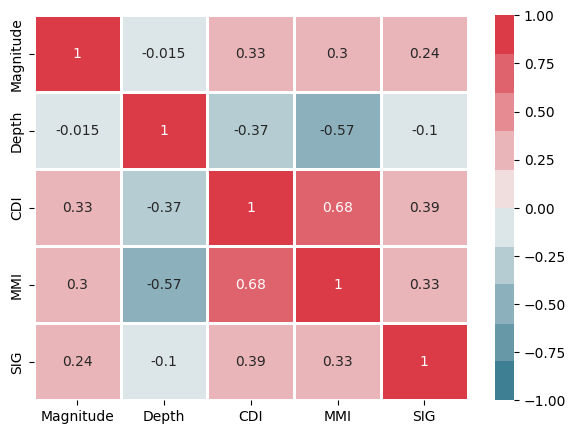

In [ ]:
numerical_cols = ['Magnitude','Depth','CDI','MMI','SIG']
dcorr = dfs[numerical_cols].corr()

mask = np.zeros_like(dcorr)
#mask shape
mask[np.triu_indices_from(mask)] = False

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(dcorr, cmap=sns.diverging_palette(220, 10, n=10),
            vmin=-1, vmax=1, center=0, linewidths=1, annot=True, mask=mask, ax=ax);